In [2]:
# libraries

import joblib
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tkinter import *

sns.set()
sc = StandardScaler()
lr = LinearRegression()
svm = SVR()
rf = RandomForestRegressor()
gr = GradientBoostingRegressor()

In [3]:
# read the raw data

data = pd.read_csv(r'Admission_Predict.csv')

In [4]:
# check the data set

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [6]:
# we saw that it has 0 nulls already, but still checking
# just to practice and keep habit

data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# some general statistics about our data set

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
# dropping irrelevant features

data = data.drop('Serial No.', axis=1)

In [9]:
# store feature matrix and response 
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

In [10]:
# test and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
# feature scaling because we will use a linear regression model

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# training models

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [13]:
# prediction on test data

y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [14]:
# evaluating of our regression models

linear_score = metrics.r2_score(y_test, y_pred1)
vector_support_score  = metrics.r2_score(y_test, y_pred2)
random_forest_score = metrics.r2_score(y_test, y_pred3)
gradient_boosting_score = metrics.r2_score(y_test, y_pred4)

In [15]:
final_data = pd.DataFrame({'Models' : ['Linear', 'Vector Support', 'Random Forest', 'Gradient Boosting'],
    'R2_score':[linear_score, vector_support_score, random_forest_score, gradient_boosting_score]})

final_data

,Models,R2_score
0,Linear,0.821208
1,Vector Support,0.759781
2,Random Forest,0.800356
3,Gradient Boosting,0.796824


<Axes: xlabel='Models', ylabel='R2_score'>

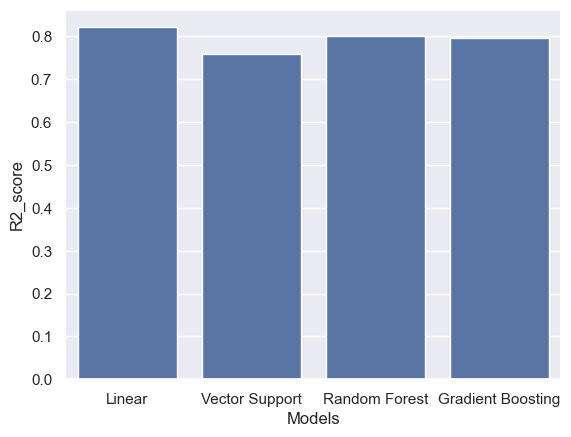

In [16]:
# using seaborn to compare our models
# we come to the conclusion that linear regression is our best model

sns.barplot(x=final_data['Models'], y=final_data['R2_score'])

In [17]:
# saving our model

lr.fit(X, y)
joblib.dump(lr, 'admission_model')

['admission_model']

In [18]:
model = joblib.load('admission_model')

In [19]:
# making a random prediction

model.predict([[337, 118, 4, 4.5, 4.5, 9.65, 1]])

c:\Users\carra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.95145856])

In [21]:
# tool that helps you put your own values and predict easier

def show_entry():

    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())

    model = joblib.load('admission_model')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7]])

    Label(master, text= f'{result*100}% chances of admission').grid(row=31)

master = Tk()

master.title("Graduate Admission Prediction")

Label(master, text= "Enter your GRE score").grid(row=1)
Label(master, text= "Enter your TOEFL").grid(row=2)
Label(master, text= "Enter University Rating").grid(row=3)
Label(master, text= "Enter SOP").grid(row=4)
Label(master, text= "Enter LOR").grid(row=5)
Label(master, text= "Enter your CPGA").grid(row=6)
Label(master, text= "Research").grid(row=7)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)

Button(master, text="Predict", command=show_entry).grid()

mainloop()
